In [1]:
#import libaries
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
diatoms = np.loadtxt('diatoms.txt')
diatoms = np.ndarray.transpose(diatoms)

In [3]:
# define 1 cell
def diatom1plot(data, **kwargs):
    diatom_x = data[::2]
    diatom_y = data[1::2]
    plt.plot(diatom_x, diatom_y, **kwargs)
    plt.axis('equal')

In [4]:
# define all cells
def diatomsplot(data):
    for i in range (0,180):
        diatom1plot(diatoms[:,i])

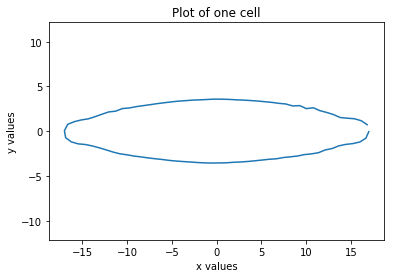

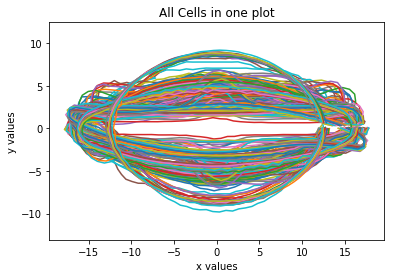

In [5]:
diatom1plot(diatoms[:,0])
plt.title('Plot of one cell')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

diatomsplot(diatoms[:,0])
plt.title('All Cells in one plot')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [6]:
# define PCA function
def pca(data):
    cov_mat = np.cov(data)
    evals, evecs = np.linalg.eig(cov_mat)
    return evals, evecs

In [7]:
# calculate eigenvalues and eigenvectors
evals, evecs = pca(diatoms)

meancells = np.mean(diatoms, 1)
blues = plt.get_cmap('Blues')
cells_along_pc = np.zeros((5,180))

In [8]:
# First PC
e1 = evecs[:,0]
lambda1 = evals[0]
std1 = np.sqrt(lambda1)

# Second PC
e2 = evecs[:,1]
lambda2 = evals[1]
std2 = np.sqrt(lambda2)

# Third PC
e3 = evecs[:,2]
lambda3 = evals[2]
std3 = np.sqrt(lambda3)

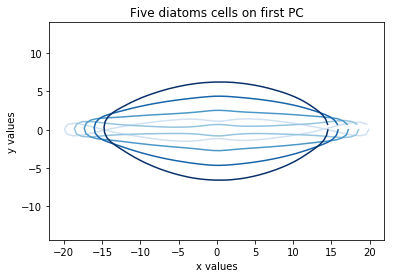

In [9]:
#plot five cells on first PC
plt.title("Five diatoms cells on first PC")
for i in range(5):
    cells_along_pc[i,:] = meancells+(i-3)*std1*e1
    diatom1plot(cells_along_pc[i], color = blues((i+1)/5))
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

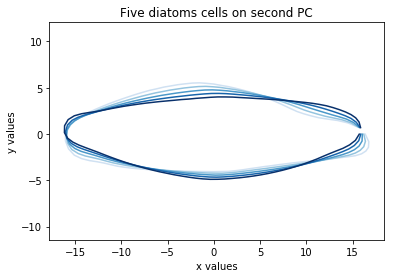

In [10]:
plt.title("Five diatoms cells on second PC")
for i in range(5):
    cells_along_pc[i,:] = meancells+(i-3)*std2*e2
    diatom1plot(cells_along_pc[i], color = blues((i+1)/5))
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

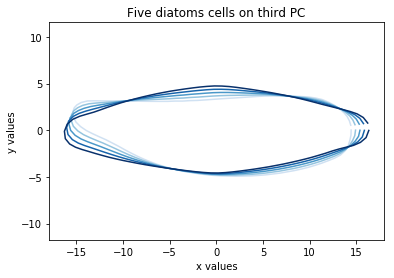

In [11]:
plt.title("Five diatoms cells on third PC")
for i in range(5):
    cells_along_pc[i,:] = meancells+(i-3)*std3*e3
    diatom1plot(cells_along_pc[i], color = blues((i+1)/5), label='cells')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [12]:
#run PCA and visualize the projection onto the first 2 PCs

In [13]:
dataTrain = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')

#split input variables and labels
x_train = dataTrain[:, :-1]
y_train = dataTrain [:, -1]

means = np.mean(x_train, axis=0) #calculating the mean of both columns instead of the mean of all together
x_train_Norm = x_train - means #mean centering

In [14]:
def pca(data):
    cov_mat = np.cov(data.T)
    evals, evecs = np.linalg.eig(cov_mat)
    return evals, evecs

def mds(data, d):
    evals, evecs = pca(data)
    projection = np.dot(data, evecs[:, :d])
    return projection

projection = mds(x_train_Norm, 2)

In [17]:
startingPoint = np.vstack((x_train_Norm[0,],x_train_Norm[1,]))
kmeans = KMeans(2, algorithm = "full", n_init = 1, init = startingPoint).fit(x_train_Norm)

y_kmeans = kmeans.predict(x_train_Norm)
evals, evecs = pca(x_train_Norm)
projected_centroids = kmeans.cluster_centers_.dot(evecs[:,:2])

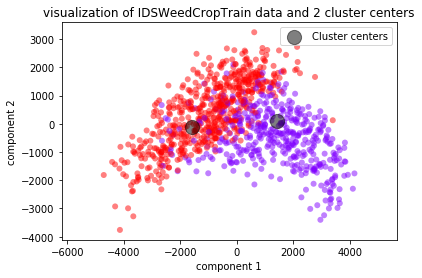

In [19]:
plt.scatter(projection[:, 0], projection[:, 1], c=y_train, edgecolor='none', alpha=0.5, cmap='rainbow')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.scatter(projected_centroids[:,0] ,projected_centroids[:,1], c='black', s=200, alpha=0.5, label='Cluster centers')
plt.legend(loc=1)
plt.axis('equal')
plt.title('visualization of IDSWeedCropTrain data and 2 cluster centers')
plt.show()